In [9]:
import pandas as pd

In [10]:
import os
os.getcwd()

'c:\\Users\\weihu\\AIProjects\\datasciencedoodle'

# Daily Rainfall in NYC 2025
Plot daily PRCP in the summer 2021-2025 from NOAA Central Park Station in one chart - with each line representing one year and x-axis labeled as month_date.

In [11]:
file_path = "content/USW00094728.csv"
df = pd.read_csv(file_path)

display(df.head())

C:\Users\weihu\AppData\Local\Temp\ipykernel_16668\3771241168.py:2: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT17,WT17_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES
0,USW00094728,1869-01-01,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",191,",,Z,",229.0,",,Z,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,1869-01-02,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",8,",,Z,null",0.0,",,Z,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094728,1869-01-03,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,"T,,Z,null",0.0,",,Z,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094728,1869-01-04,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",46,",,Z,null",0.0,",,Z,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094728,1869-01-05,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",13,",,Z,null",0.0,",,Z,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Prepare the data

### Subtask:
Convert the `DATE` column to datetime objects and filter the DataFrame to include only summer months (June, July, August) and the years 2021-2025.


**Reasoning**:
Convert the DATE column to datetime objects and filter the DataFrame for summer months (June, July, August) and years 2021-2025.



In [12]:
df['DATE'] = pd.to_datetime(df['DATE'])
df_summer = df[
    (df['DATE'].dt.year >= 2021) &
    (df['DATE'].dt.year <= 2025) &
    (df['DATE'].dt.month.isin([6, 7, 8]))
]

display(df_summer.head())

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT17,WT17_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES
55668,USW00094728,2021-06-01,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55669,USW00094728,2021-06-02,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55670,USW00094728,2021-06-03,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",97,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55671,USW00094728,2021-06-04,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",99,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55672,USW00094728,2021-06-05,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Extract month and day

### Subtask:
Create a new column representing the month and day for plotting purposes.


**Reasoning**:
Create a new column `month_day` by formatting the `DATE` column to 'MM-DD' string format.



In [13]:
df_summer['month_day'] = df_summer['DATE'].dt.strftime('%m-%d')
display(df_summer.head())

C:\Users\weihu\AppData\Local\Temp\ipykernel_16668\2660691664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer['month_day'] = df_summer['DATE'].dt.strftime('%m-%d')


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT17_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,month_day
55668,USW00094728,2021-06-01,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-01
55669,USW00094728,2021-06-02,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-02
55670,USW00094728,2021-06-03,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",97,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-03
55671,USW00094728,2021-06-04,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",99,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-04
55672,USW00094728,2021-06-05,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-05


## Visualize the data

### Subtask:
Create a plot showing the daily precipitation for each year in the summer months (2021-2025), with month and day on the x-axis.


**Reasoning**:
Generate a line plot to visualize the daily precipitation in summer for each year from 2021 to 2025, with month and day on the x-axis.



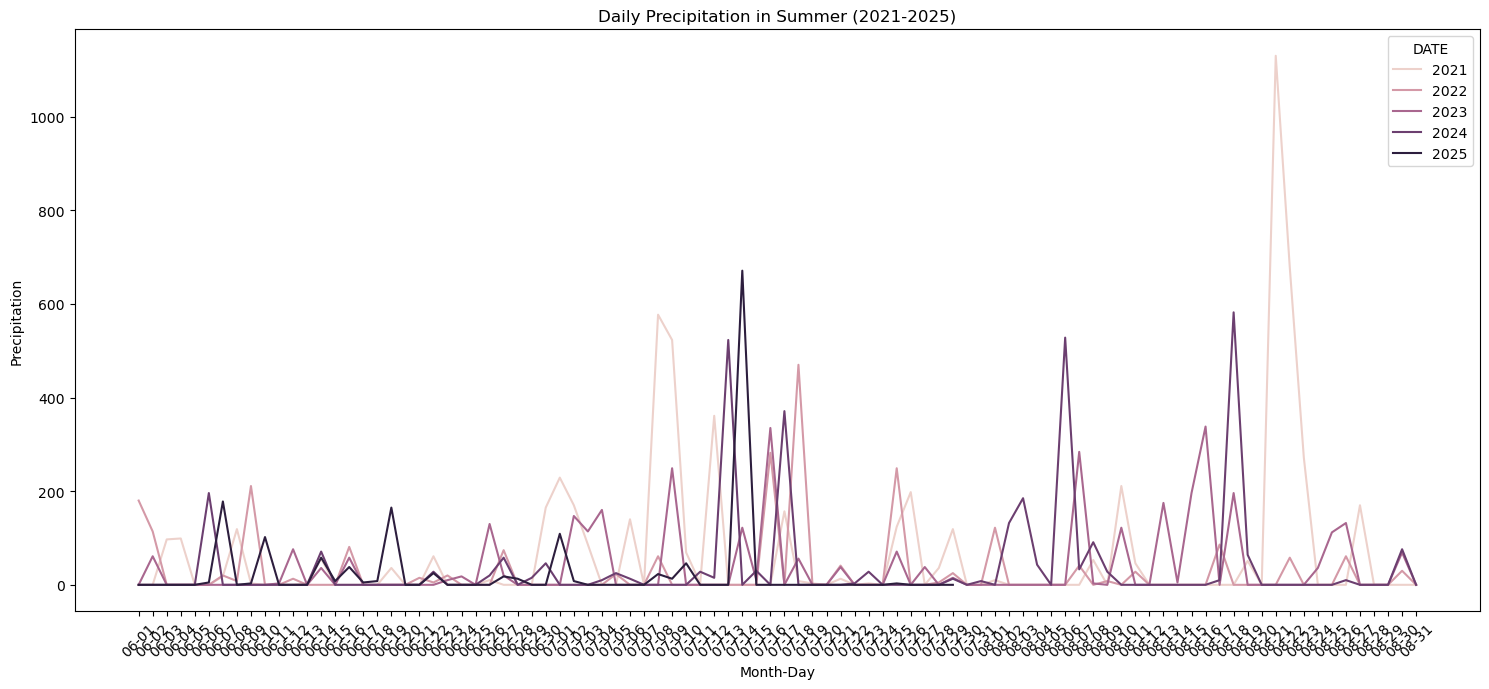

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.lineplot(data=df_summer, x='month_day', y='PRCP', hue=df_summer['DATE'].dt.year)
plt.title('Daily Precipitation in Summer (2021-2025)')
plt.xlabel('Month-Day')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The daily precipitation data for the summer months (June, July, August) from 2021 to 2025 was successfully filtered and prepared for visualization.
*   A line plot was generated showing the daily precipitation for each summer, with individual lines representing each year from 2021 to 2025, allowing for a visual comparison of precipitation patterns across these years.

### Insights or Next Steps

*   Analyze the plot to identify any noticeable trends or significant differences in daily precipitation amounts or patterns across the summer months from 2021 to 2025.
*   Consider calculating and comparing summary statistics (e.g., average daily precipitation, total summer precipitation) for each year to quantify the differences observed in the plot.


## Prepare data for heatmap

### Subtask:
Reshape the filtered data to have years as rows, month-days as columns, and precipitation as values.

**Reasoning**:
Pivot the `df_summer` DataFrame to create a matrix suitable for a heatmap, with the index as the year, columns as 'month_day', and values as 'PRCP'.

In [15]:
df_heatmap = df_summer.pivot_table(index=df_summer['DATE'].dt.year, columns='month_day', values='PRCP')
display(df_heatmap.head())

month_day,06-01,06-02,06-03,06-04,06-05,06-06,06-07,06-08,06-09,06-10,...,08-22,08-23,08-24,08-25,08-26,08-27,08-28,08-29,08-30,08-31
DATE,,,,,,,,,,,,,,,,,,,,,
2021,0.0,0.0,97.0,99.0,0.0,0.0,18.0,119.0,3.0,0.0,...,678.0,272.0,0.0,0.0,0.0,170.0,0.0,0.0,0.0,0.0
2022,180.0,114.0,0.0,0.0,0.0,0.0,20.0,8.0,211.0,0.0,...,58.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,30.0,0.0
2023,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36.0,112.0,132.0,0.0,0.0,0.0,69.0,0.0
2024,0.0,0.0,0.0,0.0,0.0,196.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,76.0,0.0
2025,0.0,0.0,0.0,0.0,0.0,5.0,178.0,0.0,3.0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualize the heatmap

### Subtask:
Create a heatmap showing the daily precipitation for each year in the summer months (2021-2025), with month and day on the x-axis and year on the y-axis.

**Reasoning**:
Generate a heatmap using `df_heatmap` to visualize the daily precipitation, with years on the y-axis, month-days on the x-axis, and color intensity representing the precipitation amount.

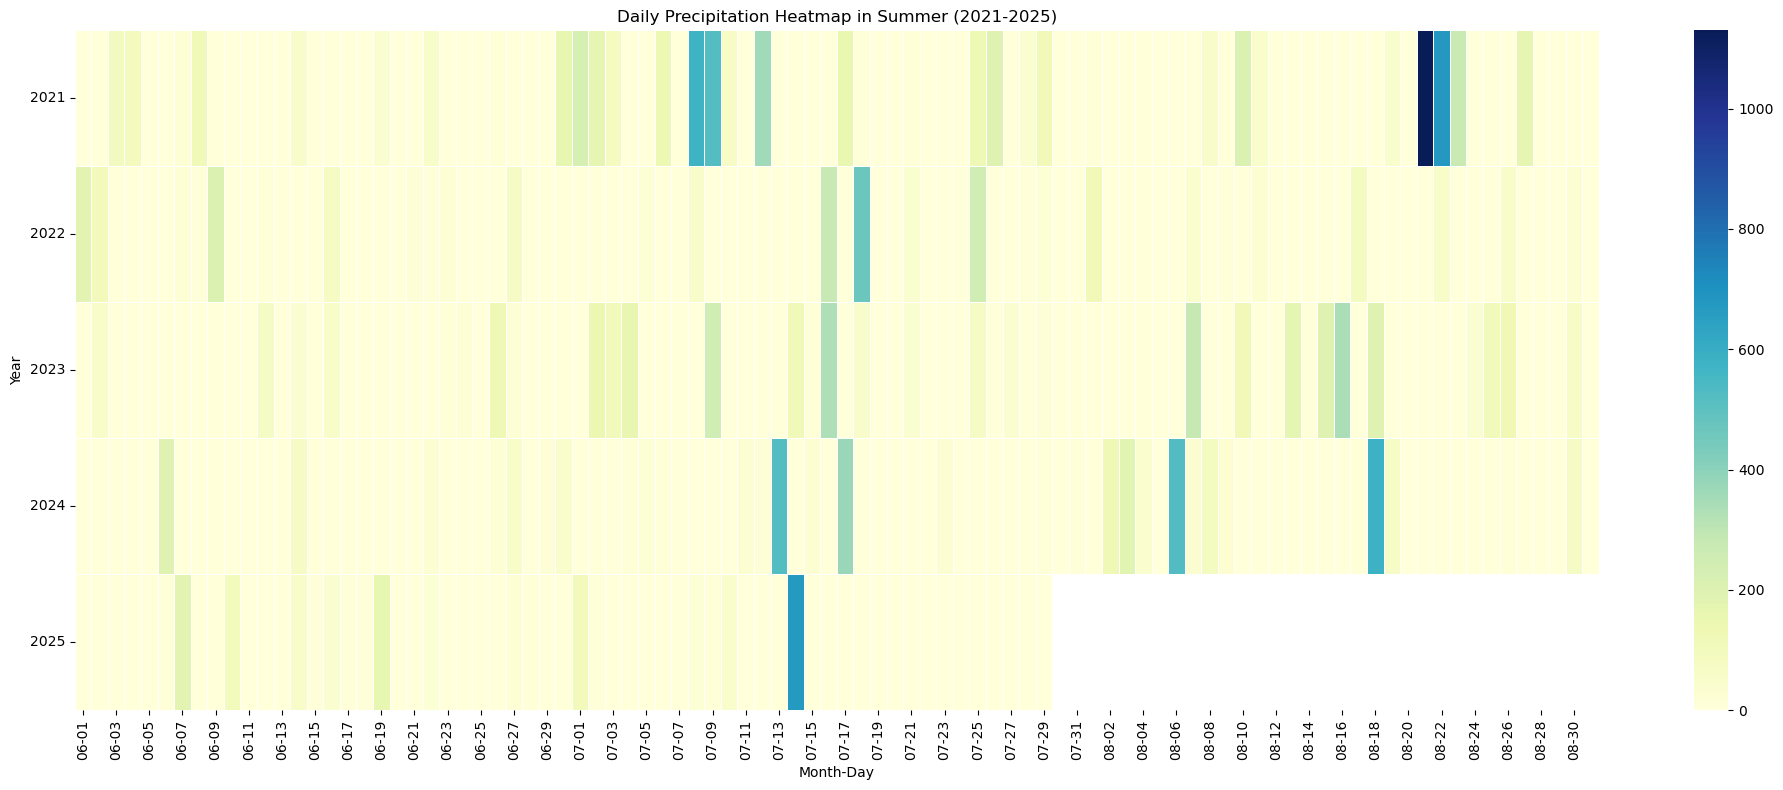

In [16]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_heatmap, cmap="YlGnBu", linewidths=.5)
plt.title('Daily Precipitation Heatmap in Summer (2021-2025)')
plt.xlabel('Month-Day')
plt.ylabel('Year')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

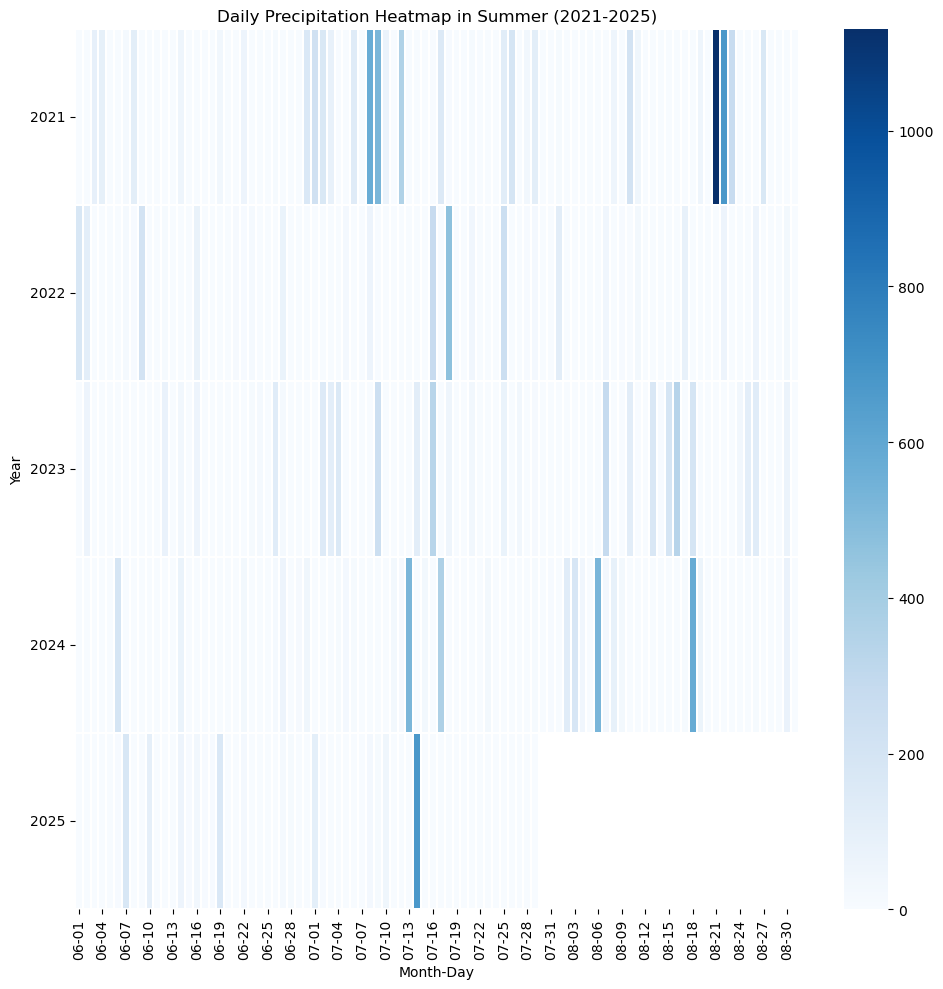

In [17]:
plt.figure(figsize=(10, 10)) # Adjusted figure size for Instagram
sns.heatmap(df_heatmap, cmap="Blues", linewidths=.2) # Changed color palette and linewidth
plt.title('Daily Precipitation Heatmap in Summer (2021-2025)')
plt.xlabel('Month-Day')
plt.ylabel('Year')
plt.yticks(rotation=0)
plt.xticks(rotation=90) # Rotated x-axis labels for better readability
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

* The daily precipitation data for the summer months (June, July, August) from 2021 to 2025 was successfully filtered and prepared for visualization.
* A heatmap was generated to visualize the daily precipitation across the summer months for each year from 2021 to 2025. This visualization allows for easy identification of days and years with high or low precipitation.

### Insights or Next Steps

* Analyze the heatmap to identify any visual patterns, such as consecutive days of rain, periods of drought, or significant differences in precipitation between years.
* Quantify the observations from the heatmap by calculating summary statistics for each year or month, such as total precipitation, average daily precipitation, or the number of rainy days.
* Consider exploring other weather parameters in the dataset and visualizing their patterns as well.

# Task
Plot daily cumulative rainfall from the table df_summer for the past 5 years using a line chart with each line representing a year and the x-axis representing month-day.

## Calculate cumulative precipitation

### Subtask:
Calculate the cumulative sum of 'PRCP' for each year in `df_summer`.


**Reasoning**:
Sort the dataframe by date and calculate the cumulative sum of precipitation for each year.



In [18]:
df_summer = df_summer.sort_values(by='DATE')
df_summer['cumulative_PRCP'] = df_summer.groupby(df_summer['DATE'].dt.year)['PRCP'].cumsum()
display(df_summer.head())

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,month_day,cumulative_PRCP
55668,USW00094728,2021-06-01,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-01,0
55669,USW00094728,2021-06-02,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-02,0
55670,USW00094728,2021-06-03,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",97,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-03,97
55671,USW00094728,2021-06-04,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",99,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-04,196
55672,USW00094728,2021-06-05,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,",,W,2400",0.0,",,W,2400",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-05,196


## Visualize cumulative precipitation

### Subtask:
Create a line plot showing the daily cumulative precipitation for each year from 2021 to 2025, with month and day on the x-axis.


**Reasoning**:
Generate a line plot to visualize the daily cumulative precipitation in summer for each year from 2021 to 2025, with month and day on the x-axis.



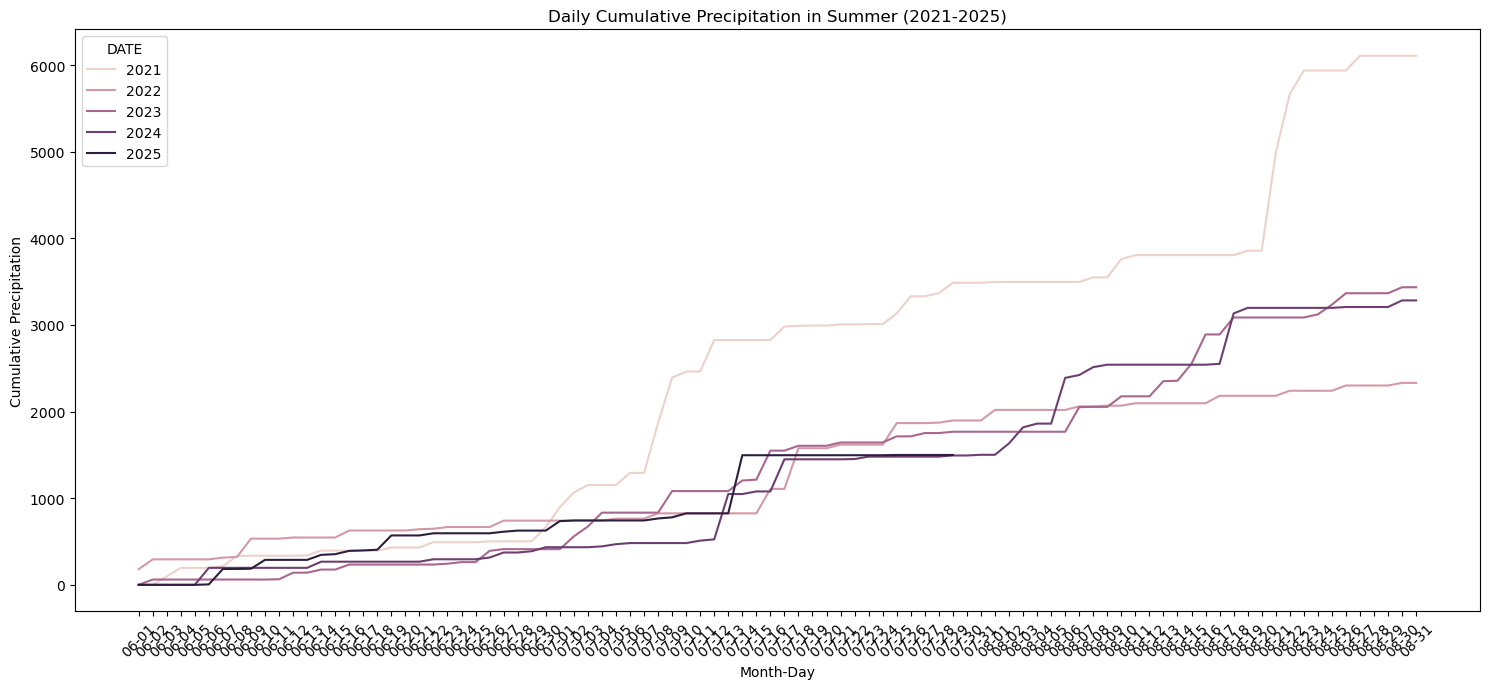

In [19]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_summer, x='month_day', y='cumulative_PRCP', hue=df_summer['DATE'].dt.year) # Changed color palette
plt.title('Daily Cumulative Precipitation in Summer (2021-2025)')
plt.xlabel('Month-Day')
plt.ylabel('Cumulative Precipitation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The cumulative precipitation was calculated for each year in the dataset.
*   A line plot was generated showing the daily cumulative precipitation for each year from 2021 to 2025, with month-day on the x-axis.

### Insights or Next Steps

*   Compare the cumulative precipitation trends across different years to identify any significant variations or patterns.
*   Analyze the maximum cumulative precipitation reached in each year to understand which year had the highest total summer rainfall.


In [20]:
import altair as alt

# Reset the index and create separate month and day columns
df_summer_reset = df_summer.copy()
df_summer_reset['year'] = df_summer_reset['DATE'].dt.year
df_summer_reset['month'] = df_summer_reset['DATE'].dt.strftime('%m')
df_summer_reset['day'] = df_summer_reset['DATE'].dt.strftime('%d')

# Filter out invalid month-day combinations
df_summer_reset = df_summer_reset[
    df_summer_reset['DATE'].dt.is_month_start |
    (df_summer_reset['DATE'].dt.day <= df_summer_reset['DATE'].dt.daysinmonth)
]

chart = alt.Chart(df_summer_reset).mark_rect(stroke='white', strokeWidth=0.5).encode(
    x=alt.X('day:O', axis=alt.Axis(title='Day', labelAngle=0)), # Use day for the inner axis
    y=alt.Y('year:O', axis=alt.Axis(title='Year')),
    color=alt.Color('PRCP:Q', title='Precipitation'),
    tooltip=['DATE', 'PRCP'],
    column=alt.Column('month:O', header=alt.Header(titleOrient="bottom", labelOrient="bottom"), title='Month', spacing=5), # Reduced spacing between columns
    size=alt.Size('PRCP:Q', legend=None) # Added size encoding based on PRCP, removed legend
).properties(
    title='Daily Precipitation Heatmap in Summer (2021-2025)',
    width= 500 # Adjusted width to make it more narrow
).interactive()

chart.display()

c:\Users\weihu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\weihu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\weihu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\weihu\anaconda3\Lib\site-packages\altair\utils\core.

alt.Chart(...)